In [1]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

#Viewing Summary()
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq,df)

In [2]:
#Loading data
data = pd.read_csv('Data/2.02. Binary predictors.csv')
data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [3]:
#Creating dummy variables
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data['Gender'] = data['Gender'].map({'Male': 0, 'Female':1})
data.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [4]:
#Fitting model
x1 = data[['SAT','Gender']]
y = data['Admitted']
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Tue, 03 Jan 2023   Pseudo R-squ.:                  0.8249
Time:                        21:54:44   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Predictions Table

In [5]:
results_log.pred_table()

array([[69.,  5.],
       [ 4., 90.]])

In [6]:
#Confusion matrix
cm_df = pd.DataFrame(results_log.pred_table())
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,0,1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [7]:
#Accuracy
cm = np.array(cm_df)
accuracy_train = (cm[0,0] + cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

#### Testing the model

In [8]:
test = pd.read_csv('Data/2.03. Test dataset.csv')
test['Admitted'] = test['Admitted'].map({'Yes':1,'No':0})
test['Gender'] = test['Gender'].map({'Male':1,'Female':0})

In [9]:
test_actual = test['Admitted'] # Holding the actual test data which is admitted
test_data =test.drop(['Admitted'], axis=1)
 # to add the constant
test_data = sm.add_constant(test_data)

In [10]:
test_data.head()

,const,SAT,Gender
0,1.0,1323,1
1,1.0,1725,0
2,1.0,1762,0
3,1.0,1777,1
4,1.0,1665,1


In [11]:
test_data = test_data[x.columns.values]

In [12]:
test_data.head()

,const,SAT,Gender
0,1.0,1323,1
1,1.0,1725,0
2,1.0,1762,0
3,1.0,1777,1
4,1.0,1665,1


### Creating Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [32]:
#Converting values to 1 if they are greater than or equal to 0.5 and 0 is less
pred_values = results_log.predict(test_data)
pred_values = [1 if i >= 0.5 else 0 
               for i in pred_values.values]

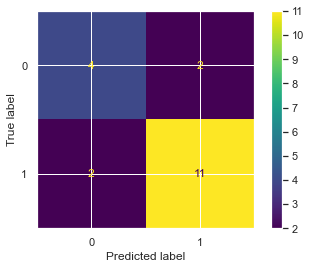

In [33]:
cm = confusion_matrix(test_actual, pred_values)
disp = ConfusionMatrixDisplay(cm)
disp.plot()